<a href="https://colab.research.google.com/github/almeida25/time_series_ibovespa/blob/master/Tech02v05%20-%20Carlos%20Eduardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [700]:
plt.style.use('fivethirtyeight')

In [701]:
url = 'https://raw.githubusercontent.com/almeida25/time_series_ibovespa/master/dados_ibovespa_dez00-ago23.csv'

In [702]:
df = pd.read_csv(url, sep=',', parse_dates=[0], index_col="Data",dayfirst=True)

In [703]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"


In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5611 entries, 2019-12-30 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    5611 non-null   float64
 1   Abertura  5611 non-null   float64
 2   Máxima    5611 non-null   float64
 3   Mínima    5611 non-null   float64
 4   Vol.      5610 non-null   object 
 5   Var%      5611 non-null   object 
dtypes: float64(4), object(2)
memory usage: 306.9+ KB


In [705]:
df.sort_values('Data',inplace=True)

In [706]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2000-12-27,15.186,14.805,15.223,14.805,"239,98M","2,65%"
2000-12-28,15.259,15.188,15.269,15.132,"324,26M","0,48%"
2001-01-02,15.425,15.242,15.621,15.174,"230,63M","1,09%"
2001-01-03,16.599,15.425,16.599,15.251,"381,20M","7,61%"
2001-01-04,16.675,16.597,16.933,16.587,"331,23M","0,46%"


In [707]:
df['Último'] = df['Último']*1_000
df['Abertura'] = df['Abertura'] *1_000
df['Máxima'] = df['Máxima']*1_000
df['Mínima'] = df['Mínima']*1_000

df['retorno'] = df['Último'].pct_change(1)

#df['alvo5'] = df['Último'].shift(-5)
#df['dir_dia'] = np.where(df['retorno'] > 0, 'Alta', 'Baixa')
#df['proporcao'] = (df['Último']-df['Abertura'])/(df['Máxima']-df['Mínima'])
#df['volatlidade_5_dias'] = df['retorno'].rolling(5).std()
df['alvo1'] = df['Último'].shift(-1)

In [708]:
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,retorno,alvo1
Data,,,,,,,,
2000-12-27,15186.0,14805.0,15223.0,14805.0,"239,98M","2,65%",NaN,15259.0
2000-12-28,15259.0,15188.0,15269.0,15132.0,"324,26M","0,48%",0.004807,15425.0
2001-01-02,15425.0,15242.0,15621.0,15174.0,"230,63M","1,09%",0.010879,16599.0
2001-01-03,16599.0,15425.0,16599.0,15251.0,"381,20M","7,61%",0.076110,16675.0
2001-01-04,16675.0,16597.0,16933.0,16587.0,"331,23M","0,46%",0.004579,16410.0
...,...,...,...,...,...,...,...,...
2023-08-16,115592.0,116171.0,117338.0,115534.0,"18,86M","-0,50%",-0.004984,114982.0
2023-08-17,114982.0,115592.0,116610.0,114859.0,"12,75M","-0,53%",-0.005277,115409.0
2023-08-18,115409.0,114973.0,115729.0,114423.0,"10,60M","0,37%",0.003714,114429.0


In [709]:
def convert_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1000000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1000
    return vol

In [710]:
df = df.replace(",",".", regex = True)

In [711]:
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [712]:
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,retorno,alvo1
Data,,,,,,,,
2000-12-27,15186.0,14805.0,15223.0,14805.0,239980000.0,2.65%,NaN,15259.0
2000-12-28,15259.0,15188.0,15269.0,15132.0,324260000.0,0.48%,0.004807,15425.0
2001-01-02,15425.0,15242.0,15621.0,15174.0,230630000.0,1.09%,0.010879,16599.0
2001-01-03,16599.0,15425.0,16599.0,15251.0,381200000.0,7.61%,0.076110,16675.0
2001-01-04,16675.0,16597.0,16933.0,16587.0,331230000.0,0.46%,0.004579,16410.0
...,...,...,...,...,...,...,...,...
2023-08-16,115592.0,116171.0,117338.0,115534.0,18860000.0,-0.50%,-0.004984,114982.0
2023-08-17,114982.0,115592.0,116610.0,114859.0,12750000.0,-0.53%,-0.005277,115409.0
2023-08-18,115409.0,114973.0,115729.0,114423.0,10600000.0,0.37%,0.003714,114429.0


In [713]:
df = df.drop(['Var%'], axis=1)

In [714]:
df

,Último,Abertura,Máxima,Mínima,Vol.,retorno,alvo1
Data,,,,,,,
2000-12-27,15186.0,14805.0,15223.0,14805.0,239980000.0,NaN,15259.0
2000-12-28,15259.0,15188.0,15269.0,15132.0,324260000.0,0.004807,15425.0
2001-01-02,15425.0,15242.0,15621.0,15174.0,230630000.0,0.010879,16599.0
2001-01-03,16599.0,15425.0,16599.0,15251.0,381200000.0,0.076110,16675.0
2001-01-04,16675.0,16597.0,16933.0,16587.0,331230000.0,0.004579,16410.0
...,...,...,...,...,...,...,...
2023-08-16,115592.0,116171.0,117338.0,115534.0,18860000.0,-0.004984,114982.0
2023-08-17,114982.0,115592.0,116610.0,114859.0,12750000.0,-0.005277,115409.0
2023-08-18,115409.0,114973.0,115729.0,114423.0,10600000.0,0.003714,114429.0


<Axes: xlabel='Data', ylabel='Último'>

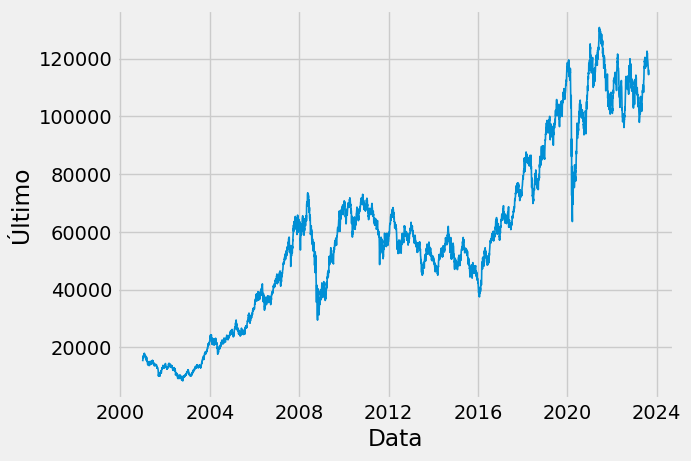

In [715]:
sns.lineplot(data=df, x=df.index, y='Último', linewidth=1.2)

In [716]:
correl = df.corr()['alvo1']
correl

Último      0.999448
Abertura    0.998979
Máxima      0.999264
Mínima      0.999297
Vol.       -0.646003
retorno     0.004297
alvo1       1.000000
Name: alvo1, dtype: float64

<Axes: >

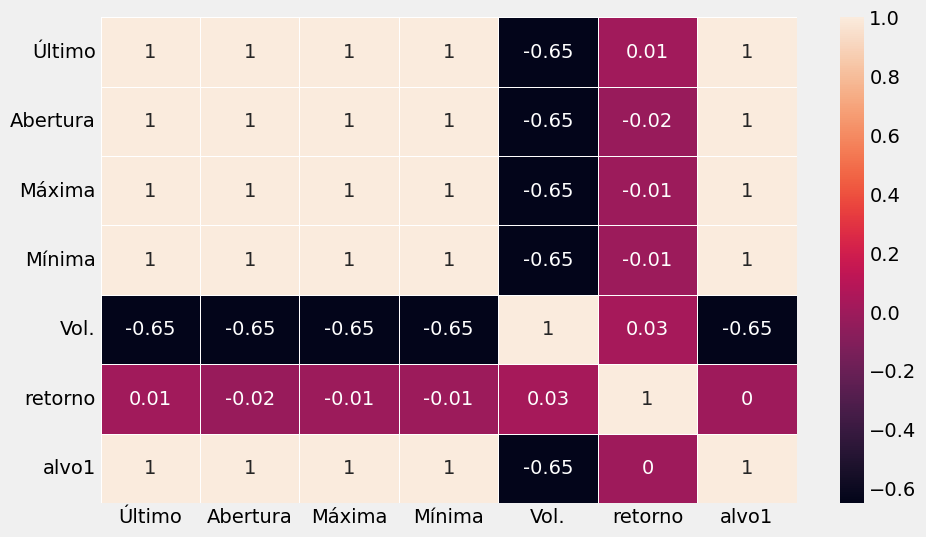

In [717]:
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [718]:
 #df.drop(['Último', 'Abertura', 'Máxima', 'Mínima'], axis=1).describe()

In [719]:
df_filtrado = df.dropna()
df_filtrado.columns

Index(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'retorno', 'alvo1'], dtype='object')

In [800]:
periodo_base = int(len(df_filtrado) * 0.05) # determinando o período
train, test = df_filtrado.iloc[:-periodo_base], df_filtrado.iloc[-periodo_base:]
h = len(test)

## Print dos dados
print("Dados base treino:")
print("Data inicial:", train.index.min())
print("Data final:",train.index.max())
print("Tamanho de dados na base:",len(train))

print("\nDados base validação:")
print("Data inicial:", test.index.min())
print("Data final:",test.index.max())
print("Tamanho de dados na base:",len(test))

Dados base treino:
Data inicial: 2000-12-28 00:00:00
Data final: 2022-07-08 00:00:00
Tamanho de dados na base: 5328

Dados base validação:
Data inicial: 2022-07-11 00:00:00
Data final: 2023-08-21 00:00:00
Tamanho de dados na base: 280


In [801]:
df1_train = df_filtrado.iloc[:-periodo_base]
df1_test = df_filtrado.iloc[-periodo_base:]

In [802]:
#x_train = df1_train.drop('alvo1',axis=1)
x_train = df1_train['Último']
y_train = df1_train['alvo1']

#x_test = df1_test.drop('alvo1',axis=1)
x_test = df1_test['Último']
y_test = df1_test['alvo1']

In [803]:
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

In [819]:
x_train_, x_test_

(            const    Último
 Data                       
 2000-12-28    1.0   15259.0
 2001-01-02    1.0   15425.0
 2001-01-03    1.0   16599.0
 2001-01-04    1.0   16675.0
 2001-01-05    1.0   16410.0
 ...           ...       ...
 2022-07-04    1.0   98609.0
 2022-07-05    1.0   98295.0
 2022-07-06    1.0   98719.0
 2022-07-07    1.0  100730.0
 2022-07-08    1.0  100289.0
 
 [5328 rows x 2 columns],
             const    Último
 Data                       
 2022-07-11    1.0   98212.0
 2022-07-12    1.0   98271.0
 2022-07-13    1.0   97881.0
 2022-07-14    1.0   96121.0
 2022-07-15    1.0   96551.0
 ...           ...       ...
 2023-08-15    1.0  116171.0
 2023-08-16    1.0  115592.0
 2023-08-17    1.0  114982.0
 2023-08-18    1.0  115409.0
 2023-08-21    1.0  114429.0
 
 [280 rows x 2 columns])

In [804]:
lr_sm = sm.OLS(y_train, x_train_).fit()

y_pred_train = lr_sm.predict(x_train_)

y_pred_test = lr_sm.predict(x_test_)

lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  alvo1   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.539e+06
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:49:48   Log-Likelihood:                -44409.
No. Observations:                5328   AIC:                         8.882e+04
Df Residuals:                    5326   BIC:                         8.883e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3434     29.753      1.625      0.104      -9.984     106.671
Último         0.9994      0.000   2130.406      0.000       0.999       1.000
==============================================================================
Omnibus:                     1959.599   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68295.763
Skew:                          -1.096   Prob(JB):                         0.00
Kurtosis:                      20.402   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [805]:
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test})

resultados

,Real,Previsto
Data,,
2022-07-11,98271.0,98203.385402
2022-07-12,97881.0,98262.351185
2022-07-13,96121.0,97872.577366
2022-07-14,96551.0,96113.598077
2022-07-15,96916.0,96543.348699
...,...,...
2023-08-15,115592.0,116151.970089
2023-08-16,114982.0,115573.305879
2023-08-17,115409.0,114963.659649


Text(0, 0.5, 'Real')

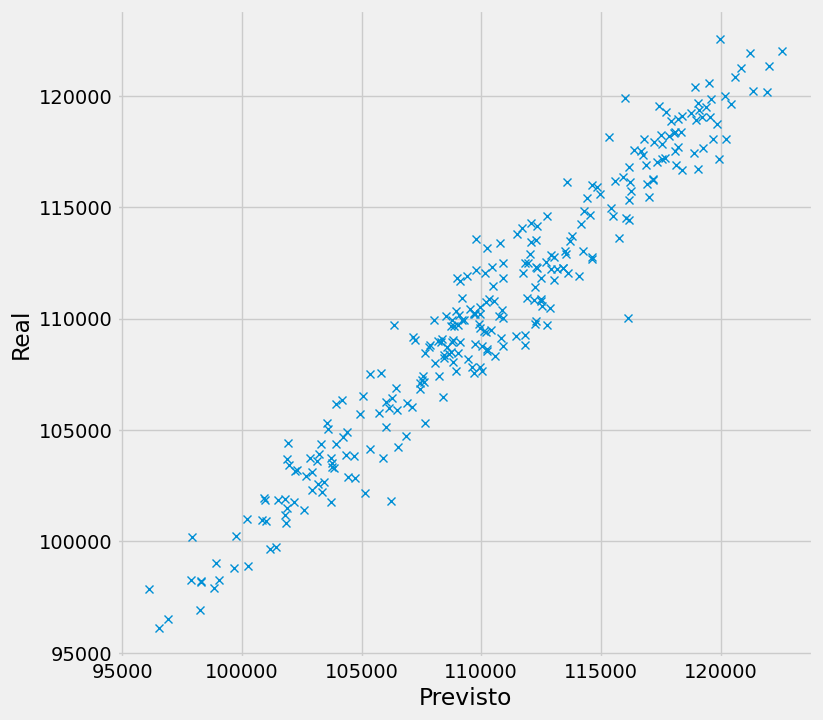

In [806]:
plt.figure(figsize=(8,8))
plt.plot(y_test, y_pred_test, 'x', label = 'Real x Previsto')
plt.xlabel('Previsto')
plt.ylabel('Real')

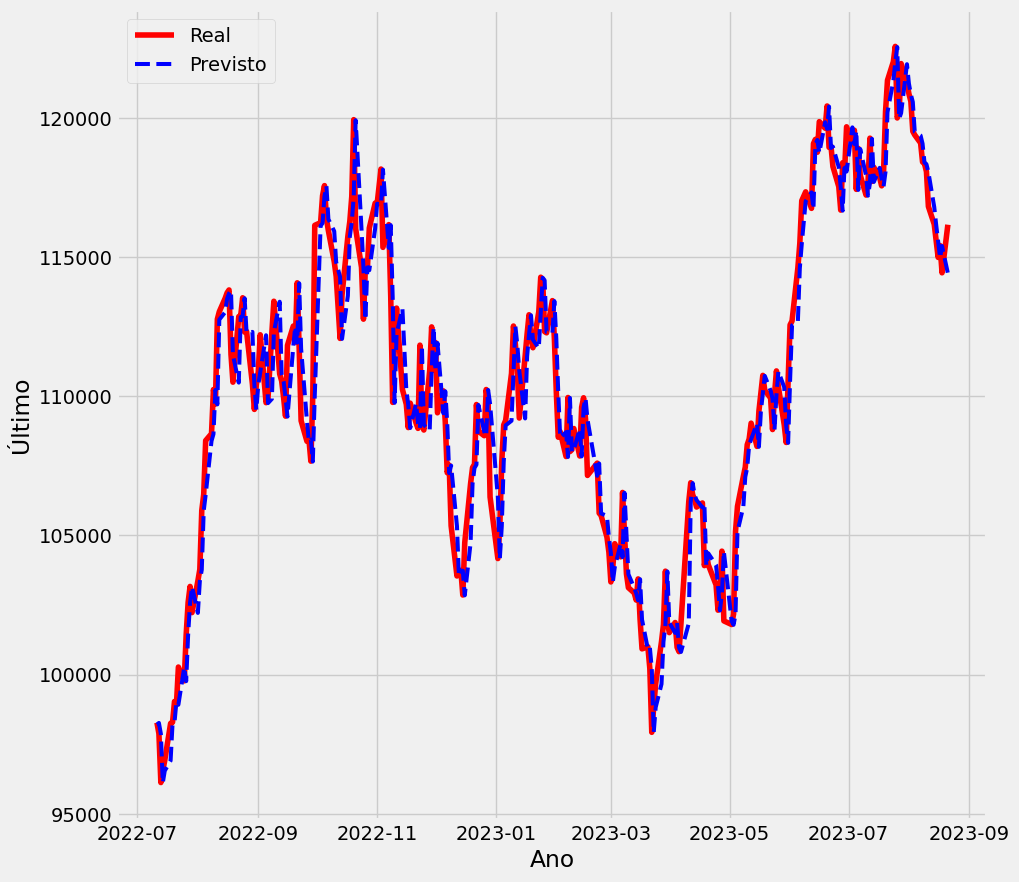

In [807]:
plt.figure(figsize=(10,10))
plt.plot(resultados['Real'], label='Real', c='red')
plt.plot(resultados['Previsto'], '--', label='Previsto', linewidth=2.9, c='blue')
plt.xlabel('Ano')
plt.ylabel('Último')
plt.legend(loc='upper left')

In [808]:
MAE_train_sm = sm.tools.eval_measures.meanabs(y_train,y_pred_train)
R2_train_sm = lr_sm.rsquared
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train)

print("------- Avaliação do Treinamento -------")
print('MAE: ', round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE:', round(RMSE_train_sm,2))

MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test)
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test)

print("")
print("------- Avaliação do Teste -------")
print("MAE: ", round(MAE_test_sm,2))
print("RMSE: ",round(RMSE_test_sm,2))

------- Avaliação do Treinamento -------
MAE:  666.0
R2:  1.0
RMSE: 1008.27

------- Avaliação do Teste -------
MAE:  1104.29
RMSE:  1412.36


In [809]:
print(lr_sm.params)

const     48.343407
Último     0.999420
dtype: float64


Text(0, 0.5, 'Fitted Values')

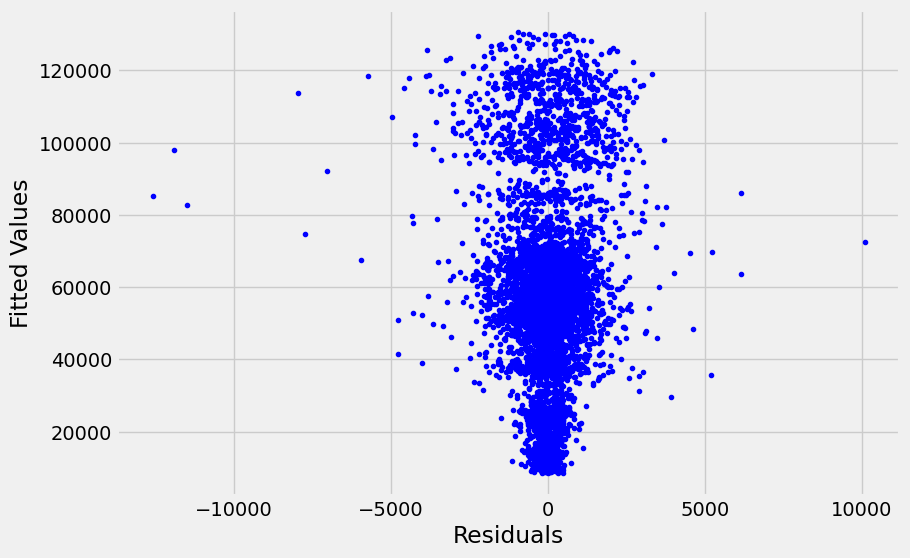

In [810]:
plt.figure(figsize=(9,6))
plt.plot(lr_sm.resid, y_pred_train, '.', color='blue')
plt.xlabel('Residuals')
plt.ylabel("Fitted Values")

((array([-3.652032  , -3.41770041, -3.2885985 , ...,  3.2885985 ,
          3.41770041,  3.652032  ]),
  array([-12586.94852451, -11921.51009163, -11510.39433873, ...,
           6147.52398535,   6148.57111028,  10088.75107061])),
 (951.3930447563946, 4.41863360650554e-11, 0.9429928983092002))

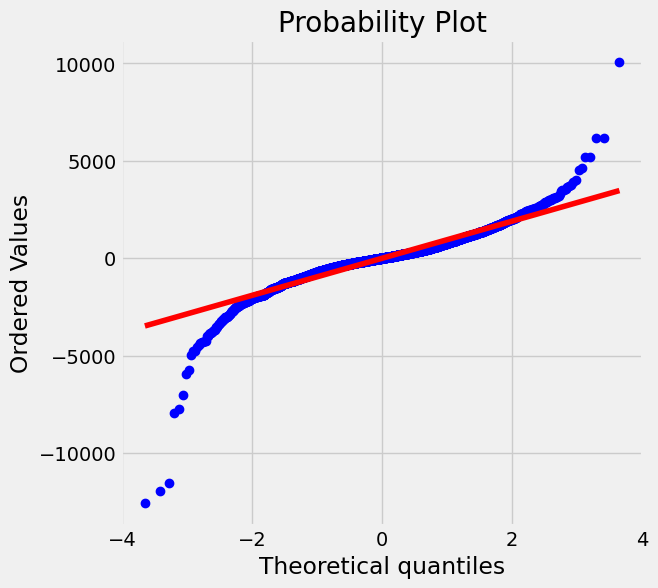

In [811]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))
sp.stats.probplot(lr_sm.resid, plot = ax, fit=True)

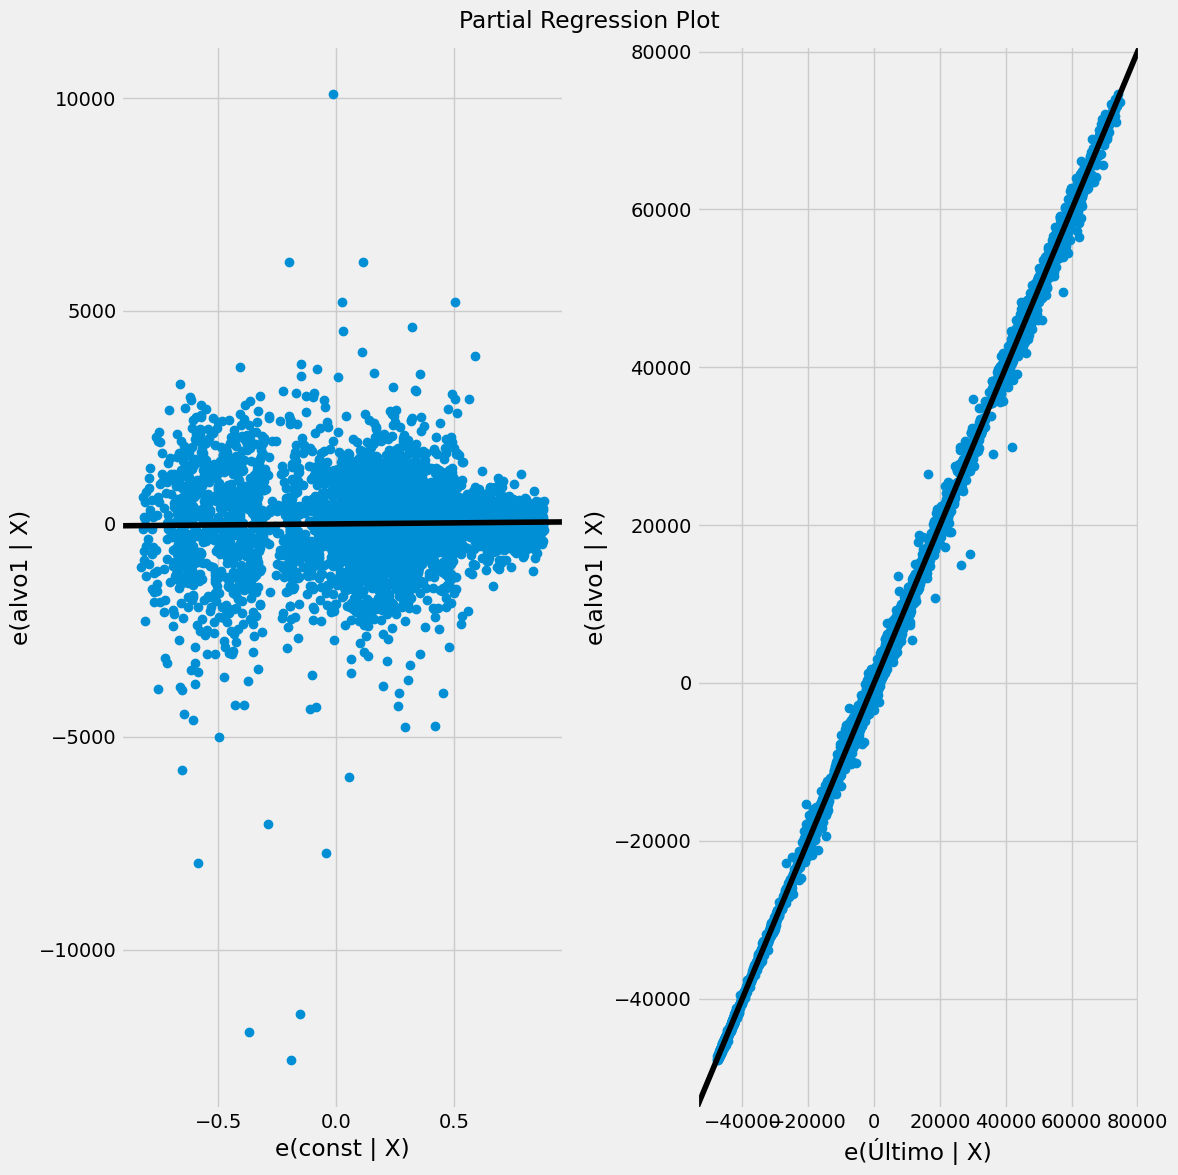

In [812]:
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig=fig)

In [813]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()


In [814]:
wmape1 = wmape(resultados['Real'],resultados['Previsto'])
print(wmape1)

0.010008377076492552


In [815]:
y_test.mean()

110336.82142857143

In [816]:
y_test.mean()*wmape1

1104.2925142787667

In [822]:
resultados['Real_lag'] = resultados['Real'].shift(1)
resultados['Previsto_lag'] = resultados['Previsto'].shift(1)
resultados['Real_dir'] = np.where(resultados['Real']>resultados['Real_lag'], 1, 0)
resultados['Previsto_dir'] = np.where(resultados['Previsto']>resultados['Previsto_lag'], 1, 0)


In [823]:
round(pd.crosstab(resultados.Previsto_dir, resultados.Real_dir, normalize=True)*100,2)

Real_dir,0,1
Previsto_dir,,
0,25.36,23.21
1,23.21,28.21


In [824]:
25.36+28.21 #acerta a direção do dia 53.57% das vezes

53.57